# Section 2.6 — Inventory of continuous distributions

This notebook contains all the code examples from [Section 2.4 Inventory of continuous distributions]() of the **No Bullshit Guide to Statistics**.


#### Notebook setup

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

%config InlineBackend.figure_format = 'retina'

DESTDIR = "figures/prob/probpanels"  # where to save figures

In [3]:
# set random seed for repeatability
np.random.seed(42)

In [4]:
# Download the `plot_helpers.py` module from the book's main github repo:
import os, requests
if not os.path.exists("plot_helpers.py"):
    resp = requests.get("https://raw.githubusercontent.com/minireference/noBSstatsnotebooks/main/notebooks/plot_helpers.py")
    with open("plot_helpers.py", "w") as f:
        f.write(resp.text)
    print("Downloaded `plot_helpers.py` module to current directory:", os.getcwd())
else:
    print("You already have plot_helpers.py, so we can proceed.")

from plot_helpers import generate_pdf_panel
from plot_helpers import plot_pdf
from plot_helpers import plot_cdf
from plot_helpers import plot_pdf_and_cdf

You already have plot_helpers.py, so we can proceed.


## Review of formulas

### Gamma function

In [5]:
from scipy.special import gamma as gammaf

gammaf(1)  # = 0! = 1

1.0

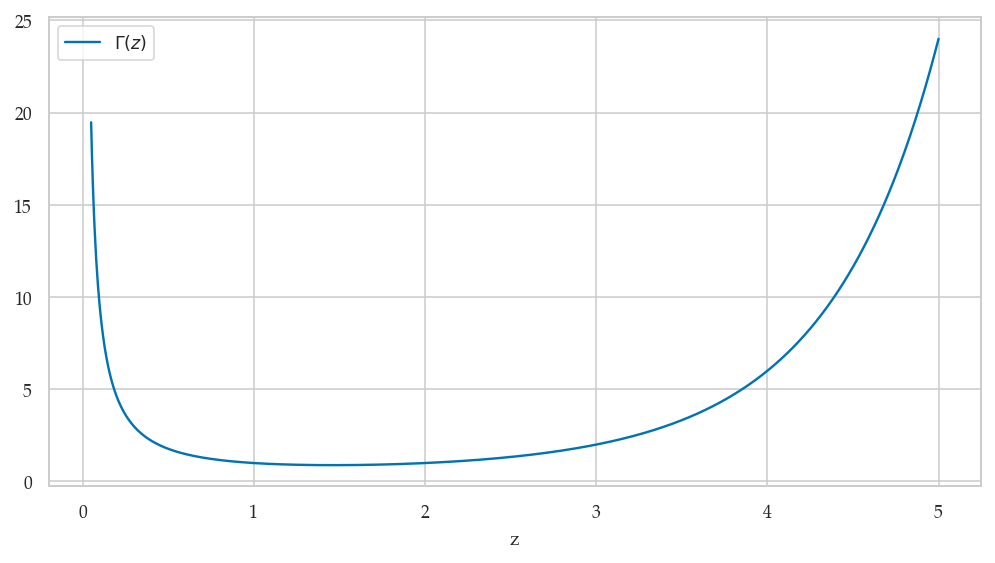

In [6]:
# plot gammaf between 0 and 5
xs = np.linspace(0.05, 5, 1000)
fXs = gammaf(xs)

ax = sns.lineplot(x=xs, y=fXs, label="$\\Gamma(z)$")
ax.set_xlabel("z")

filename = "figures/prob/gammaf_graph_0to5.pdf"
basename = filename.replace('.pdf','').replace('.png','')
ax.figure.tight_layout()
ax.figure.savefig(basename + '.pdf', dpi=300, bbox_inches="tight", pad_inches=0.02)
ax.figure.savefig(basename + '.png', dpi=300, bbox_inches="tight", pad_inches=0.02)

## Continuous distribution reference

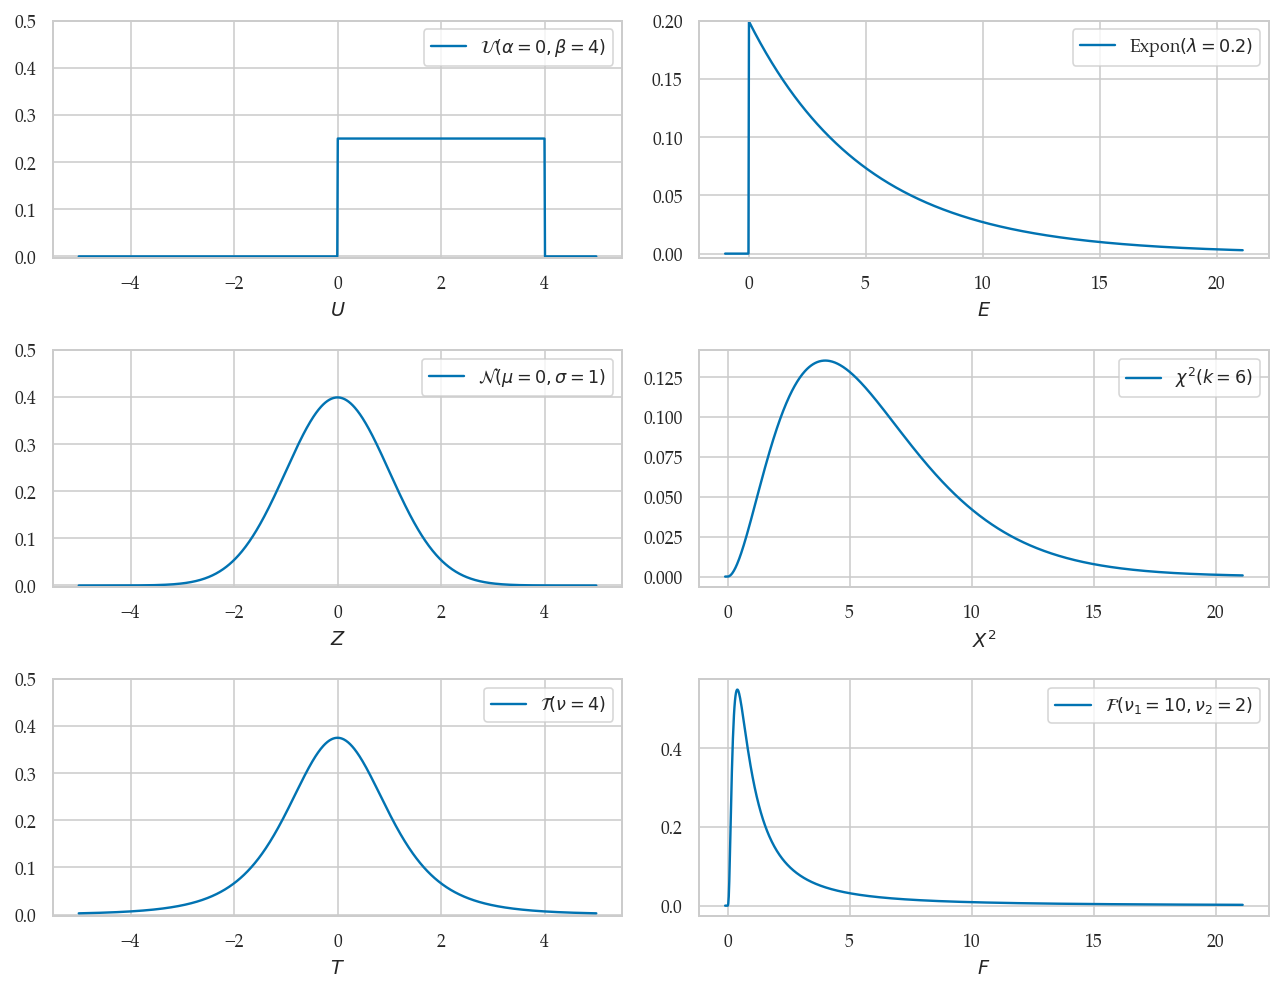

In [7]:
filename = os.path.join(DESTDIR, "prob_models_continuous_examples_panel.pdf")

from scipy.stats import uniform
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f
from scipy.stats import chi2

from plot_helpers import plot_pdf

with plt.rc_context({"figure.figsize":(9,7)}):
    fig, axs = plt.subplots(3,2) # ,sharex=True)

    # uniform
    ax = axs[0,0]
    rvU = uniform(0,4)
    plot_pdf(rvU, xlims=[-5,5], ylims=[-0.004,0.5], ax=ax, label="$\mathcal{U}(\\alpha=0,\\beta=4)$")
    ax.set_xlabel("$U$")
    ax.set_ylabel("")

    # norm
    ax = axs[1,0]
    rvN = norm(0,1)
    plot_pdf(rvN, xlims=[-5,5], ylims=[-0.004,0.5], ax=ax, label="$\mathcal{N}(\mu=0,\sigma=1)$")
    ax.set_xlabel("$Z$")
    ax.set_ylabel("")

    # t
    ax = axs[2,0]
    rvT = t(4)
    plot_pdf(rvT, xlims=[-5,5], ylims=[-0.004,0.5], ax=ax, label="$\mathcal{T}(\\nu=4)$")
    ax.set_xlabel("$T$")
    ax.set_ylabel("")

    
    # expon
    ax = axs[0,1]
    lam = 0.2
    rvU = expon(0, 1/lam)
    plot_pdf(rvU, xlims=[-1,21.1], ylims=[-0.004,0.2], ax=ax, label="Expon$(\lambda=0.2)$")
    ax.set_xlabel("$E$")
    ax.set_ylabel("")

    # chi2
    ax = axs[1,1]
    rvX2 = chi2(6)
    plot_pdf(rvX2, xlims=[-0.1,21.1], ax=ax, label="$\chi^2(k=6)$")
    ax.set_xlabel("$X^2$")
    ax.set_ylabel("")
    
    # f
    ax = axs[2,1]
    df1, df2 = 10, 2
    rvF = f(df1, df2)
    plot_pdf(rvF, xlims=[-0.1,21.1], ax=ax, label="$\mathcal{F}(\\nu_1=10,\\nu_2=2)$")
    ax.set_xlabel("$F$")
    ax.set_ylabel("")

    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

### Uniform distribution

The [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) $\mathcal{U}(\alpha,\beta)$
is described by the following probability density function:
$$
  p_X(x) =
  \begin{cases}
      \frac{1}{\beta-\alpha}  & \textrm{for } \alpha \leq x \leq \beta, \\
      0                       & \textrm{for } x<0 \textrm{ or } x>1.
  \end{cases}
$$

For a uniform distribution $\mathcal{U}(\alpha,\beta)$,
each $x$ between $\alpha$ and $\beta$ is equally likely to occur,
and values of $x$ outside this range have zero probability of occurring.

In [8]:
from scipy.stats import uniform
alpha = 2
beta = 7
rvU = uniform(alpha, beta-alpha)

In [9]:
# draw 10 random samples from X
rvU.rvs(10)

array([3.87270059, 6.75357153, 5.65996971, 4.99329242, 2.7800932 ,
       2.7799726 , 2.29041806, 6.33088073, 5.00557506, 5.54036289])

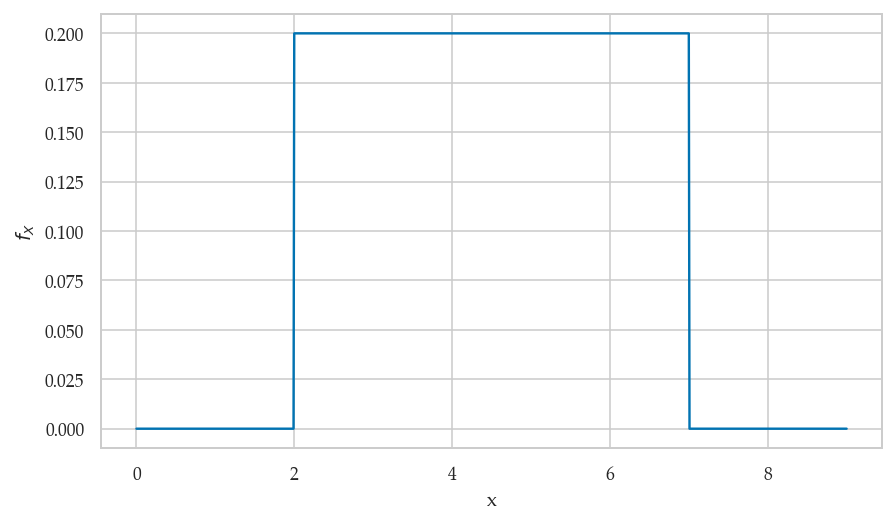

In [10]:
_ = plot_pdf(rvU, xlims=[0,9])

In [11]:
## ALT. manual plot
## plot the probability density function (pdf) of the random variable X
# x = np.linspace(-1, 2, 10000)
# fU = rvU.pdf(x)
# _ = sns.lineplot(x=x, y=fU).set_title("Probability density function $f_X$ for the uniform distribution between 0 and 1")

In [12]:
# BONUS:
# _ = plot_pdf_and_cdf(rvU, b=0.4)

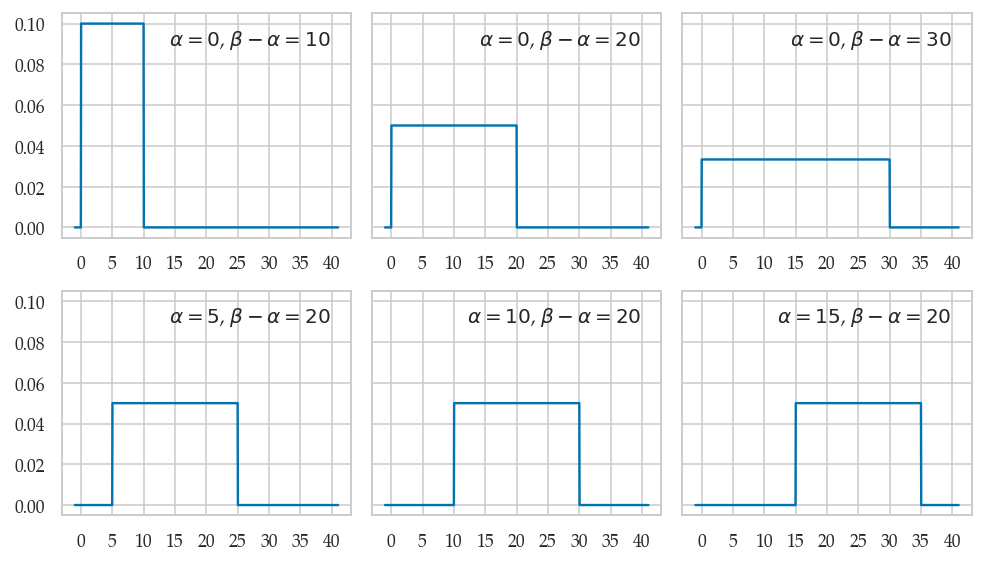

In [13]:
from scipy.stats import uniform

xmax = 41
xs = np.linspace(-1, xmax, 1000)
xticks = np.arange(0, xmax, 5)

# parameter dicts (list of lists)
params_matrix = [
    [dict(loc=0,scale=10),  dict(loc=0,scale=20),  dict(loc=0,scale=30)],
    [dict(loc=5,scale=20),  dict(loc=10,scale=20),  dict(loc=15,scale=20)],
]

params_to_latex = {
    "loc":"\\alpha",
    "scale":"\\beta - \\alpha"
}

_ = generate_pdf_panel("figures/prob/probpanels/uniform_panel.pdf",
                       xs, uniform, params_matrix,
                       params_to_latex=params_to_latex,
                       xticks=xticks)

#### Cumulative distribution function

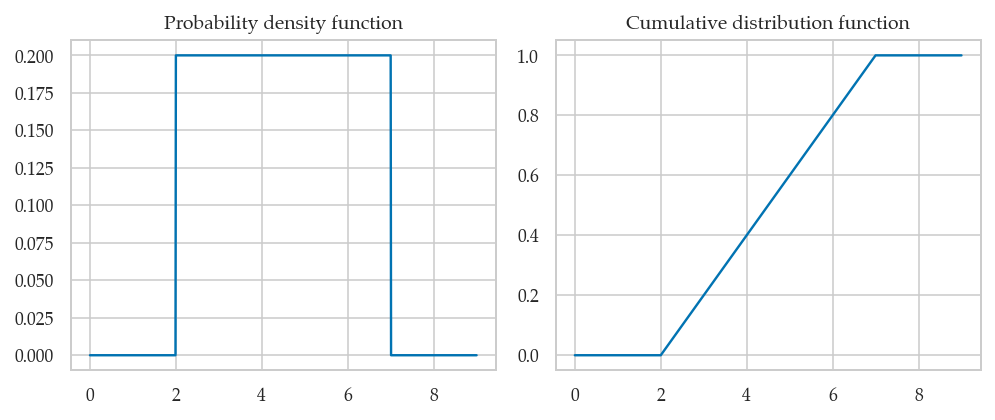

In [14]:
with plt.rc_context({"figure.figsize":(7,3)}):
    fig, axs = plot_pdf_and_cdf(rvU, xlims=[0,9])
    filename = "figures/prob/probpanels/uniform_2to7_pdf_and_CDF.pdf"
    basename = filename.replace('.pdf','').replace('.png','')
    fig.tight_layout()
    fig.savefig(basename + '.pdf', dpi=300, bbox_inches="tight", pad_inches=0.02)
    fig.savefig(basename + '.png', dpi=300, bbox_inches="tight", pad_inches=0.02)

#### Standard uniform distribution

The standard uniform distribution $U_s \sim \mathcal{U}(0,1)$ is described by the following probability density function:

$$
  p_U(x) =
  \begin{cases}
      1 & \textrm{for } 0 \leq x \leq 1, \\
      0 & \textrm{for } x<0 \textrm{ or } x>1.
  \end{cases}
$$
where $$ is the name of the random variable and $u$ are particular values it can take on.

The above equation describes tells you how likely it is to observe $\{U_s=x\}$.
For a uniform distribution $\mathcal{U}(0,1)$, each $x$ between 0 and 1 is equally likely to occur,
and values of $x$ outside this range have zero probability of occurring.

In [15]:
from scipy.stats import uniform

rvUs = uniform(0, 1)

In [16]:
# draw 10 random samples from X
rvUs.rvs(1)

array([0.02058449])

In [17]:
import random

random.seed(3)

In [18]:
random.random()

0.23796462709189137

In [19]:
random.uniform(0,1)

0.5442292252959519

In [20]:
import numpy as np
np.random.seed(42)
np.random.rand(10)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

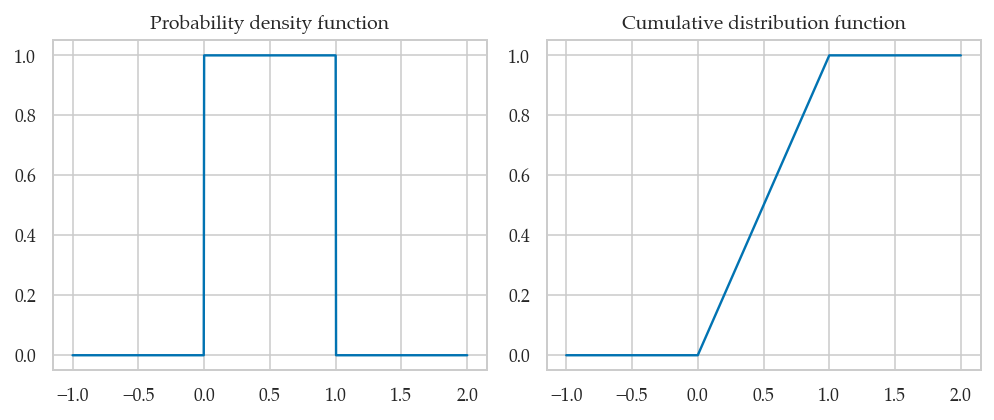

In [21]:
with plt.rc_context({"figure.figsize":(7,3)}):
    fig, axs = plot_pdf_and_cdf(rvUs, xlims=[-1,2])
    filename = "figures/prob/probpanels/uniform_std_pdf_and_CDF.pdf"
    basename = filename.replace('.pdf','').replace('.png','')
    fig.tight_layout()
    fig.savefig(basename + '.pdf', dpi=300, bbox_inches="tight", pad_inches=0.02)
    fig.savefig(basename + '.png', dpi=300, bbox_inches="tight", pad_inches=0.02)

#### Simulating other random variables

We can use the uniform random variable to generate random variables from other distributions.
For example,
suppose we want to generate observations of a coin toss random variable
which comes out `heads` 50\% of the time and `tails` 50\% of the time.

We can use the standard uniform random variables obtained from `random.random()`
and split the outcomes at the "halfway point" of the sample space,
to generate the 50-50 randomness of a coin toss.
The function `flip_coin` defined below shows how to do this:

In [22]:
def flip_coin():
    u = random.random()  # random number in [0,1]
    if u < 0.5:
        return "heads"
    else:
        return "tails"

In [23]:
# simulate one coin toss
flip_coin()

'heads'

In [24]:
# simulate 10 coin tosses
[flip_coin() for i in range(0,10)]

['tails',
 'tails',
 'heads',
 'heads',
 'tails',
 'heads',
 'heads',
 'tails',
 'heads',
 'tails']

### Exponential

In [25]:
from scipy.stats import expon
lam = 7
loc = 0
scale = 1/lam
rvE = expon(loc, scale)

The computer model `expon` accepts as its first argument an optional "location" parameter,
which can shift the exponential distribution to the right,
but we want `loc=0` to get the simple case,
that corresponds to the un-shifted distribution $\textrm{Expon}(\lambda)$.

In [26]:
rvE.mean(), rvE.var()

(0.14285714285714285, 0.02040816326530612)

In [27]:
# math formulas for mean and var
1/lam, 1/lam**2

(0.14285714285714285, 0.02040816326530612)

In [28]:
## ALT. we can obtain mean and ver using the .stats() method
##      The code below also computes the skewness and the kurtosis
# mean, var, skew, kurt = rvE.stats(moments='mvsk')
# mean, var, skew, kurt

In [29]:
# f_E(5) = pdf value at x=10
rvE.pdf(0.2)

1.7261787475912451

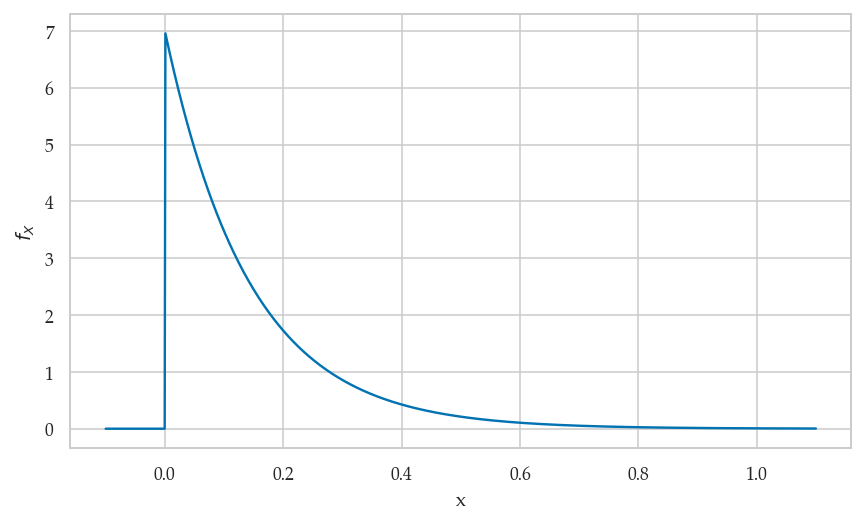

In [30]:
_ = plot_pdf(rvE, xlims=[-0.1,1.1])

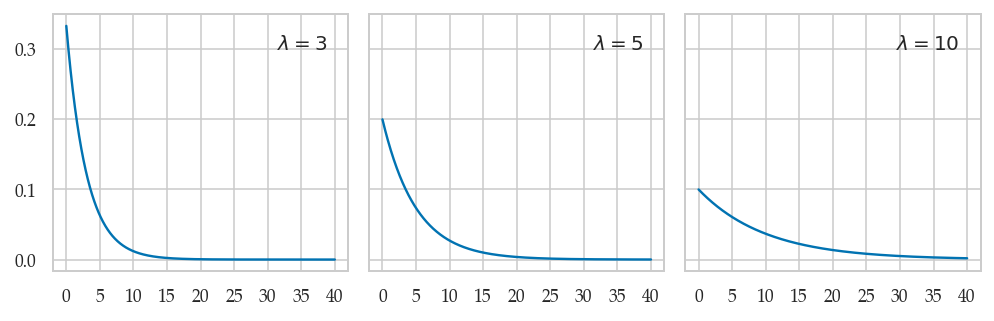

In [31]:
from scipy.stats import expon

xmax = 40
xs = np.linspace(0, xmax, 1000)
xticks = np.arange(0, xmax+5, 5)


# parameter dicts (list of lists)
params_matrix = [
    [dict(loc=0,scale=3),    dict(loc=0,scale=5),    dict(loc=0,scale=10)  ],
]

params_to_latex = {
    'scale': '\\lambda',
}

with plt.rc_context({"figure.figsize":(7,2.3)}):
    _ = generate_pdf_panel("figures/prob/probpanels/expon_panel.pdf",
                           xs, expon, params_matrix,
                           params_to_latex=params_to_latex,
                           xticks=xticks)

### Normal

A random variable $N$ with a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) 
$\mathcal{N}(\mu,\sigma)$ is described by the probability density function:
$$ \large
    f_N(x) = \tfrac{1}{\sigma\sqrt{2\pi}} e^{\small -\tfrac{(x-\mu)^2}{2\sigma^2}}.
$$
The mean $\mu$ and the standard deviation $\sigma$ are called the parameters of the distribution.
The math notation $\mathcal{N}(\mu, \sigma)$ is used to describe the whole family of normal probability distributions.


In [32]:
from scipy.stats import norm

mu = 10    # = 𝜇   where is the centre?
sigma = 3  # = 𝜎   how spread out is it?

rvN = norm(mu, sigma)

In [33]:
rvN.mean(), rvN.var()

(10.0, 9.0)

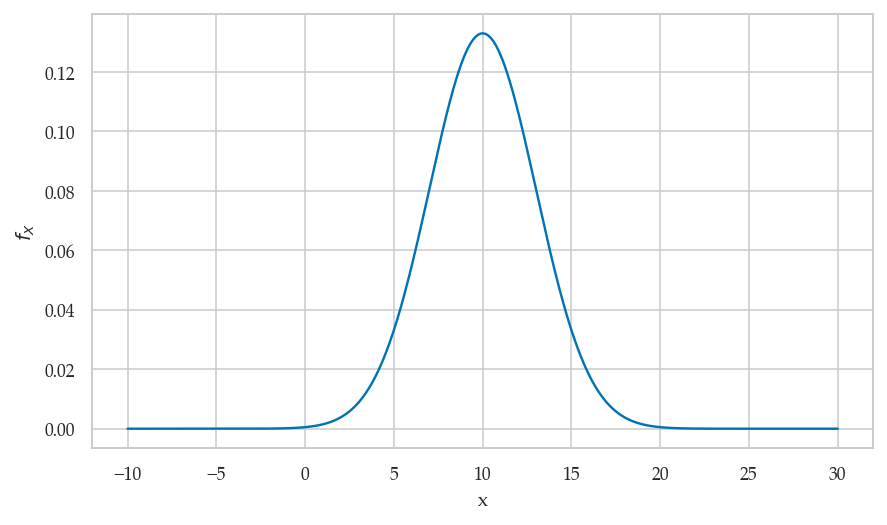

In [34]:
_ = plot_pdf(rvN, xlims=[-10,30])

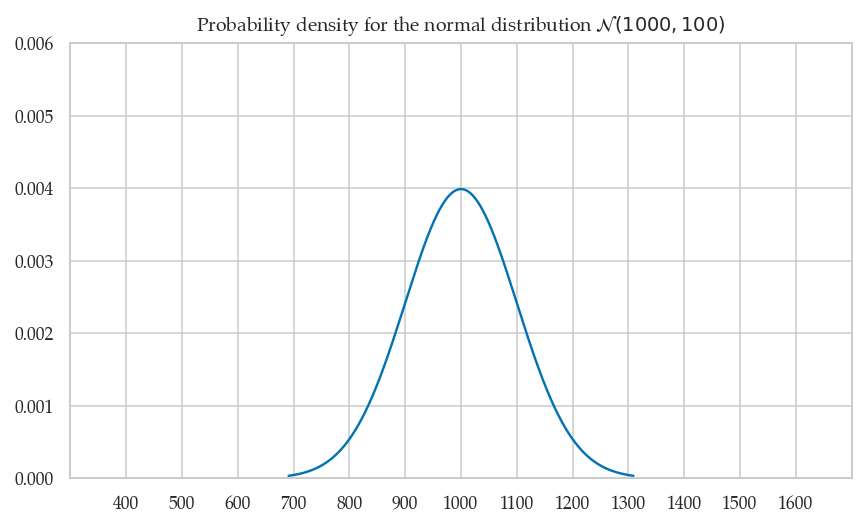

In [35]:
# ALT. generate the plot manually
from scipy.stats import norm

# 1. choose the parameters:
mean = 1000   # 𝜇 (mu)    = where is its center?
std = 100     # 𝜎 (sigma) = how spread out is it?

# 2. create a normal random variable
rvN = norm(mean, std)

# 3. plot it's probability density function (pdf)
x = np.linspace(rvN.ppf(0.001), rvN.ppf(0.999), 10000)
y = rvN.pdf(x)
ax = sns.lineplot(x=x, y=y)
title = 'Probability density for the normal distribution $\mathcal{N}('+ str(mean) + ',' + str(std) + ')$'
ax.set_title(title)
ax.set_xlim(300,1700)
plt.xticks(np.arange(400,1700,100))
_ = ax.set_ylim(0, 0.006)

#### Panel

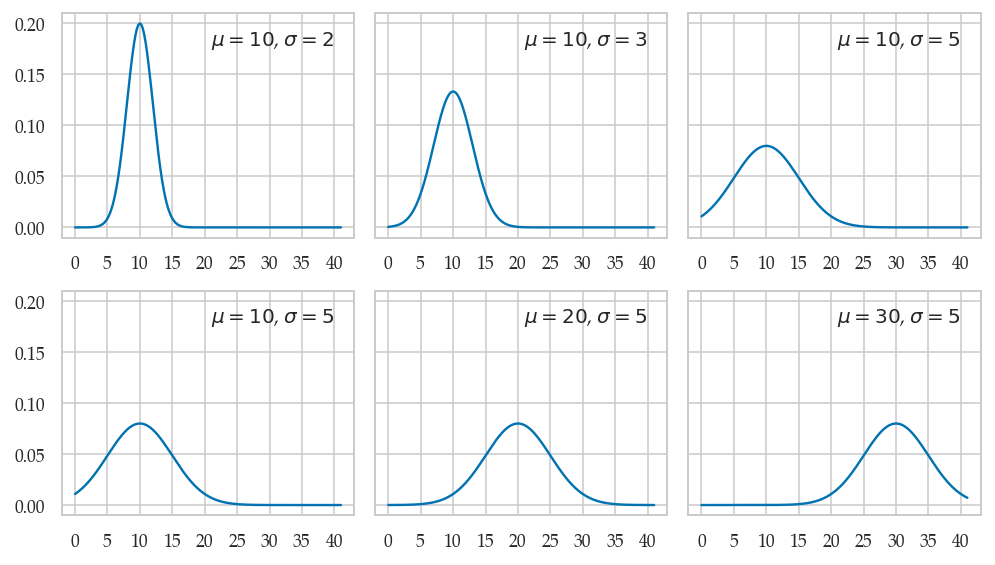

In [36]:
from scipy.stats import norm

xmax = 41
xs = np.linspace(0, xmax, 1000)
xticks = np.arange(0, xmax, 5)


# parameter dicts (list of lists)
params_matrix = [
    [dict(loc=10, scale=2),  dict(loc=10, scale=3),  dict(loc=10, scale=5)],
    [dict(loc=10, scale=5),  dict(loc=20, scale=5),  dict(loc=30, scale=5)],
]

params_to_latex = {
    'loc': '\\mu',
    'scale': '\\sigma',
}

_ = generate_pdf_panel("figures/prob/probpanels/normal_panel.pdf",
                       xs, norm, params_matrix,
                       params_to_latex=params_to_latex,
                       xticks=xticks)

### Standard normal

A standard normal is denoted $Z$ with a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) 
$\mathcal{N}(\mu=0,\sigma=1)$ and described by the probability density function:
$$ \Large
    f_Z(z) = \tfrac{1}{\sqrt{2\pi}} e^{\small -\tfrac{z^2}{2}}.
$$


In [37]:
from scipy.stats import norm

rvZ = norm(0,1)

In [38]:
rvZ.mean(), rvZ.var()

(0.0, 1.0)

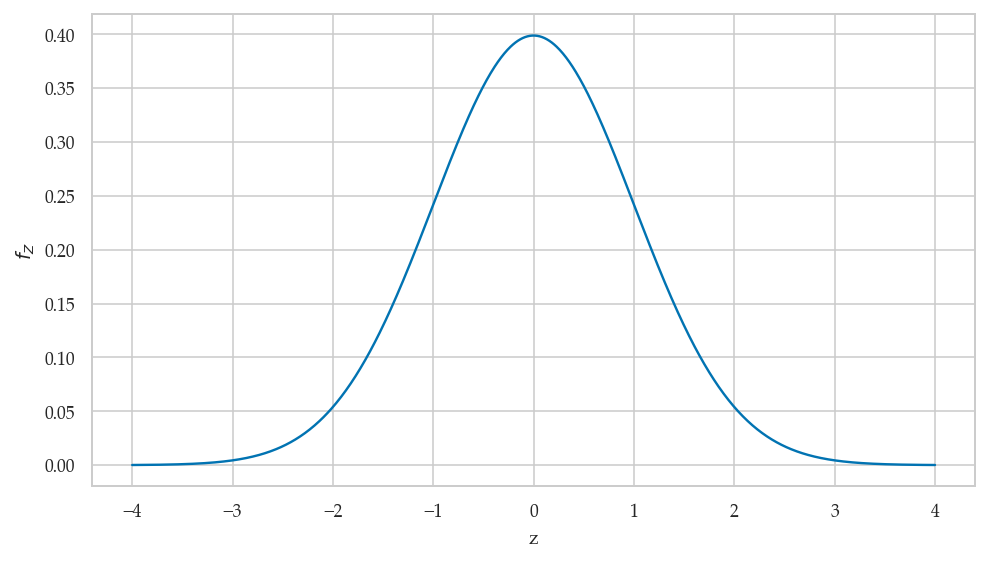

In [39]:
fig, ax = plt.subplots()

plot_pdf(rvZ, xlims=[-4,4], ax=ax, rv_name="Z")

filename = "figures/prob/probpanels/z_dist.pdf"
basename = filename.replace('.pdf','').replace('.png','')
fig.tight_layout()
fig.savefig(basename + '.pdf', dpi=300, bbox_inches="tight", pad_inches=0.02)
fig.savefig(basename + '.png', dpi=300, bbox_inches="tight", pad_inches=0.02)

#### Cumulative probabilities in the tails

Probability of $Z$ being smaller than $-2.2$.

In [40]:
rvZ.cdf(-2.3)

0.010724110021675809

Probability of $Z$ being greater than $2.2$.

In [41]:
1 - rvZ.cdf(2.3)

0.010724110021675837

Probability of $|Z| > 2.2$.

In [42]:
rvZ.cdf(-2.3) + (1-rvZ.cdf(2.3))

0.021448220043351646

In [43]:
norm.cdf(-2.3,0,1) + (1-norm.cdf(2.3,0,1))

0.021448220043351646

#### Inverse cumulative distribution calculations

In [44]:
rvZ.ppf(0.05)

-1.6448536269514729

In [45]:
rvZ.ppf(0.95)

1.6448536269514722

In [46]:
rvZ.interval(0.9)

(-1.6448536269514729, 1.6448536269514722)

### Student's $t$-distribution

This is a generalization of the standard normal with "heavy" tails.

In [47]:
from scipy.stats import t

df = 10
rvT = t(df)

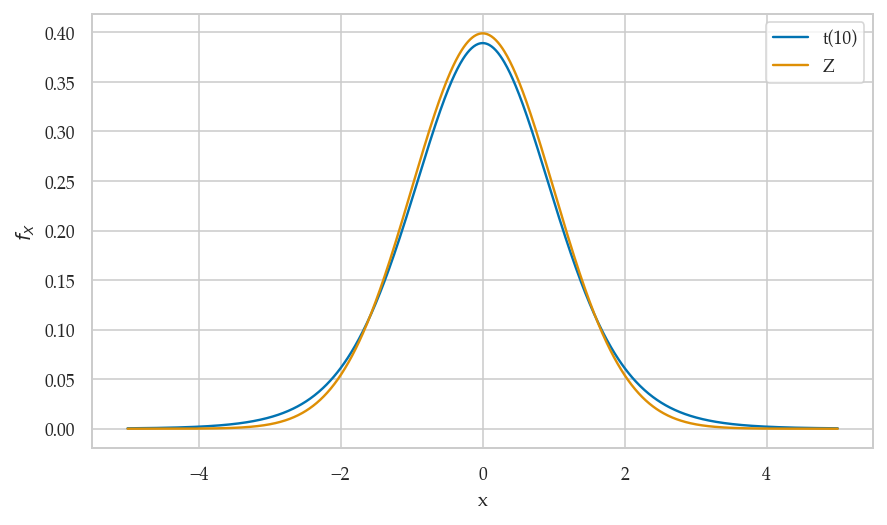

In [48]:
ax = plot_pdf(rvT, xlims=[-5,5], label=f"t({df})")
_ = plot_pdf(rvZ, xlims=[-5,5], ax=ax, label="Z")

In [49]:
rvT.mean(), rvT.var()

(0.0, 1.25)

In [50]:
# Kurtosis formula  kurt(rvT) = 6/(df-4) for df>4
rvT.stats("k")

array(1.)

In [51]:
rvT.cdf(-2.3)

0.022127156642143552

In [52]:
rvT.ppf(0.05), rvT.ppf(0.95)

(-1.8124611228107341, 1.8124611228107335)

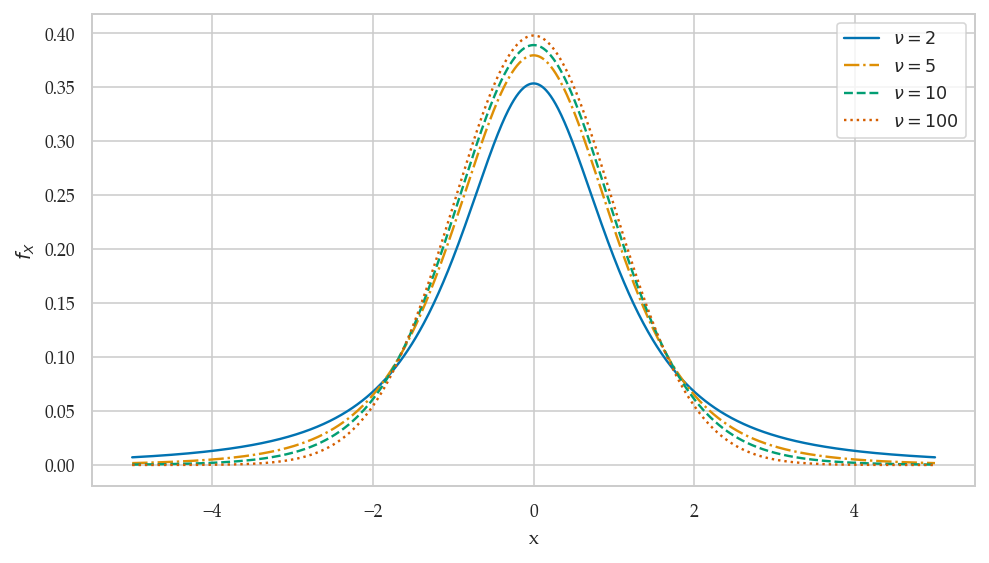

In [53]:
fig, ax = plt.subplots()

linestyles = ['solid', 'dashdot', 'dashed', 'dotted']

for i, df in enumerate([2,5,10,100]):
    rvT = t(df)
    linestyle = linestyles[i]
    plot_pdf(rvT, xlims=[-5,5], ax=ax, label="$\\nu={}$".format(df), linestyle=linestyle)

filename = "figures/prob/probpanels/t_dists.pdf"
basename = filename.replace('.pdf','').replace('.png','')
fig.tight_layout()
fig.savefig(basename + '.pdf', dpi=300, bbox_inches="tight", pad_inches=0.02)
fig.savefig(basename + '.png', dpi=300, bbox_inches="tight", pad_inches=0.02)

### Snedecor's $F$-distribution

In [54]:
from scipy.stats import f

df1, df2 = 15, 10
rvF = f(df1, df2)

In [55]:
rvF.mean(), rvF.var()

(1.25, 0.7986111111111112)

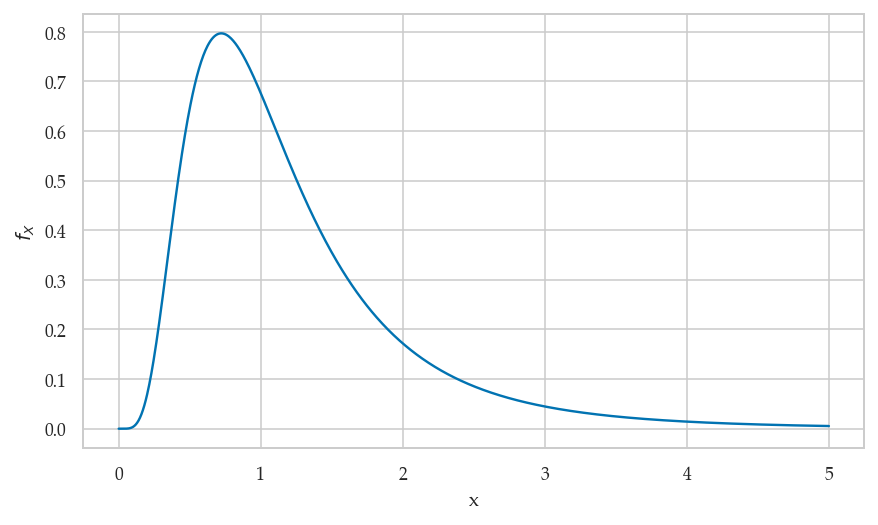

In [56]:
_ = plot_pdf(rvF, xlims=[0,5])

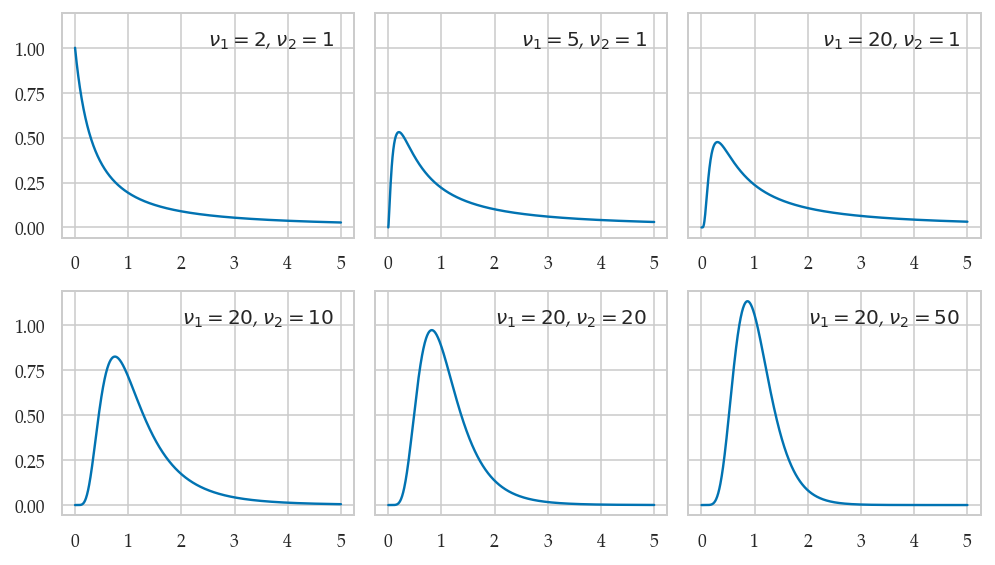

In [57]:
from scipy.stats import f

xmax = 5
xs = np.linspace(0, xmax, 1000)
xticks = np.arange(0, xmax+1, 1)


# parameter dicts (list of lists)
params_matrix = [
    [dict(dfn=2, dfd=1),    dict(dfn=5, dfd=1),    dict(dfn=20, dfd=1)],
    [dict(dfn=20, dfd=10),  dict(dfn=20, dfd=20),  dict(dfn=20, dfd=50)],
]

params_to_latex = {
    'dfn': '\\nu_1',
    'dfd': '\\nu_2',
}

_ = generate_pdf_panel("figures/prob/probpanels/f_panel.pdf",
                       xs, f, params_matrix,
                       params_to_latex=params_to_latex,
                       xticks=xticks)

### Chi-squared distribution

In [58]:
from scipy.stats import chi2

k = 10
rvX2 = chi2(k)

In [59]:
rvX2.mean(), rvX2.var()

(10.0, 20.0)

In [60]:
1 - rvX2.cdf(20)

0.02925268807696113

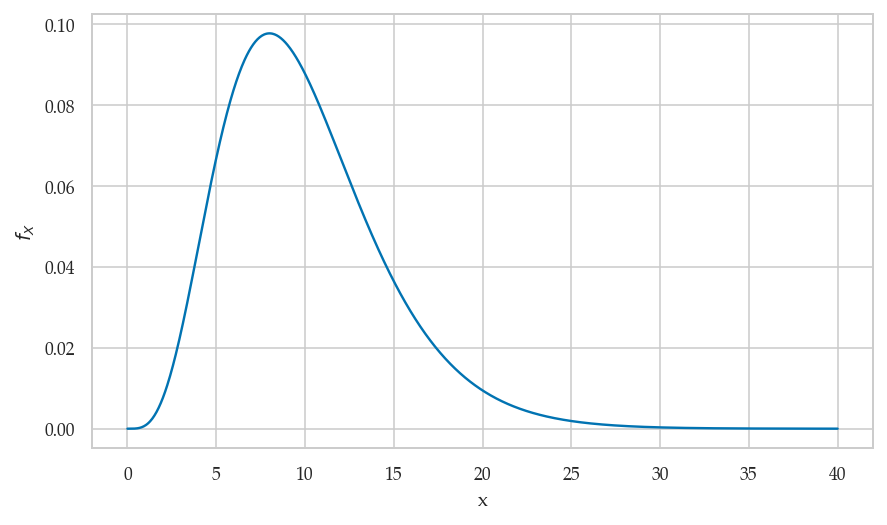

In [61]:
_ = plot_pdf(rvX2, xlims=[0,40])

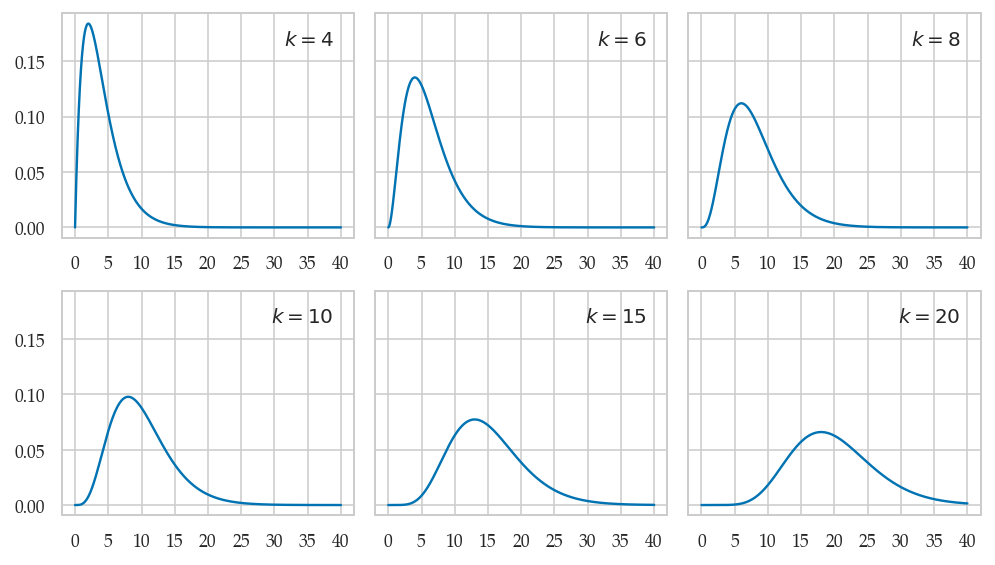

In [62]:
from scipy.stats import chi2

xmax = 40
xs = np.linspace(0, xmax, 1000)
xticks = np.arange(0, xmax+5, 5)


# parameter dicts (list of lists)
params_matrix = [
    [dict(df=4),    dict(df=6),    dict(df=8)],
    [dict(df=10),   dict(df=15),   dict(df=20)]
]

params_to_latex = {
    "df":"k",
}

_ = generate_pdf_panel("figures/prob/probpanels/chi2_panel.pdf",
                       xs, chi2, params_matrix,
                       params_to_latex=params_to_latex,
                       xticks=xticks)

### Gamma (optional)

https://en.wikipedia.org/wiki/Gamma_distribution

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html

In [63]:
from scipy.stats import gamma as gammad

alpha = 4
loc = 0
lam = 2
beta = 1/lam

rvG = gammad(alpha, loc, beta)

In [64]:
rvG.mean(), rvG.var()

(2.0, 1.0)

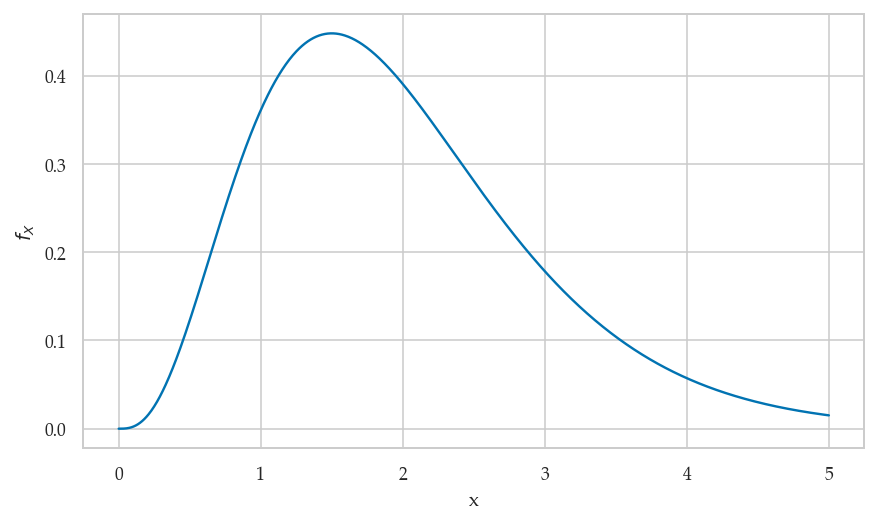

In [65]:
_ = plot_pdf(rvG, xlims=[0,5])

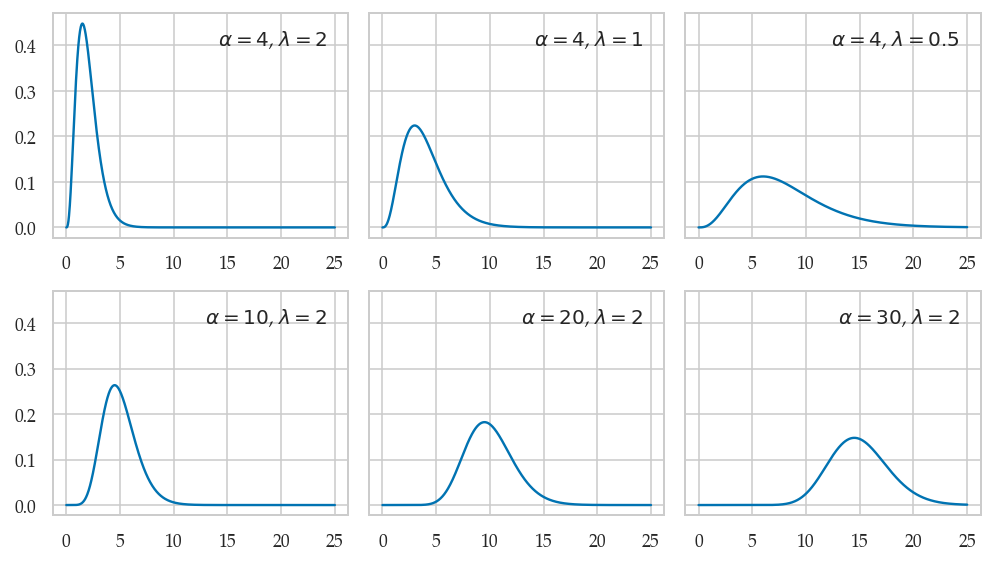

In [66]:
from scipy.stats import gamma as gammad

xmax = 25
xs = np.linspace(0, xmax, 1000)
xticks = np.arange(0, xmax+5, 5)


# parameter dicts (list of lists)
params_matrix = [
    [dict(a=4,loc=0,scale=1/2),   dict(a=4,loc=0,scale=1),     dict(a=4,loc=0,scale=2)],
    [dict(a=10,loc=0,scale=1/2),  dict(a=20,loc=0,scale=1/2),  dict(a=30,loc=0,scale=1/2)],
]

params_to_latex = {
    "a": "\\alpha",
    "lam": "\\lambda",
}

_ = generate_pdf_panel("figures/prob/probpanels/gamma_panel.pdf",
                       xs, gammad, params_matrix,
                       params_to_latex=params_to_latex,
                       xticks=xticks)

### Beta (optional)

In [67]:
from scipy.stats import beta as betad

alpha = 3
beta = 7

rvB = betad(alpha, beta)

In [68]:
rvB.mean(), rvB.var()

(0.3, 0.019090909090909092)

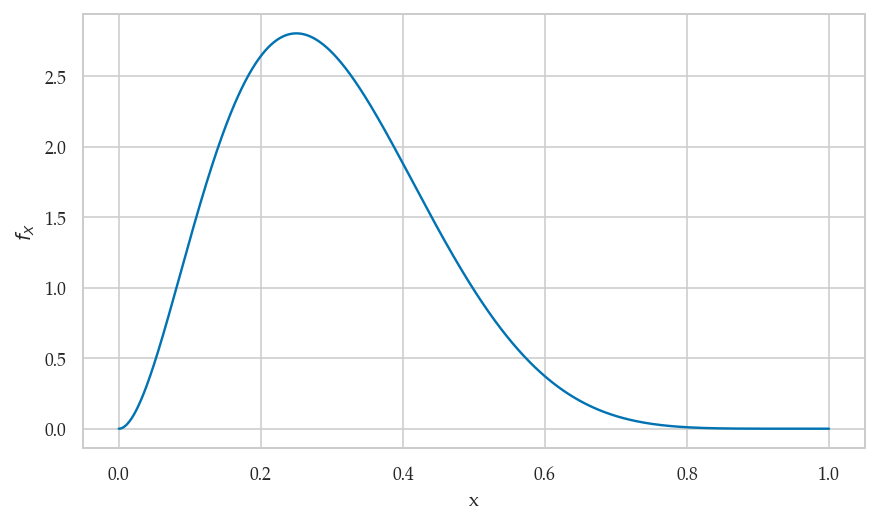

In [69]:
_ = plot_pdf(rvB, xlims=[0,1])

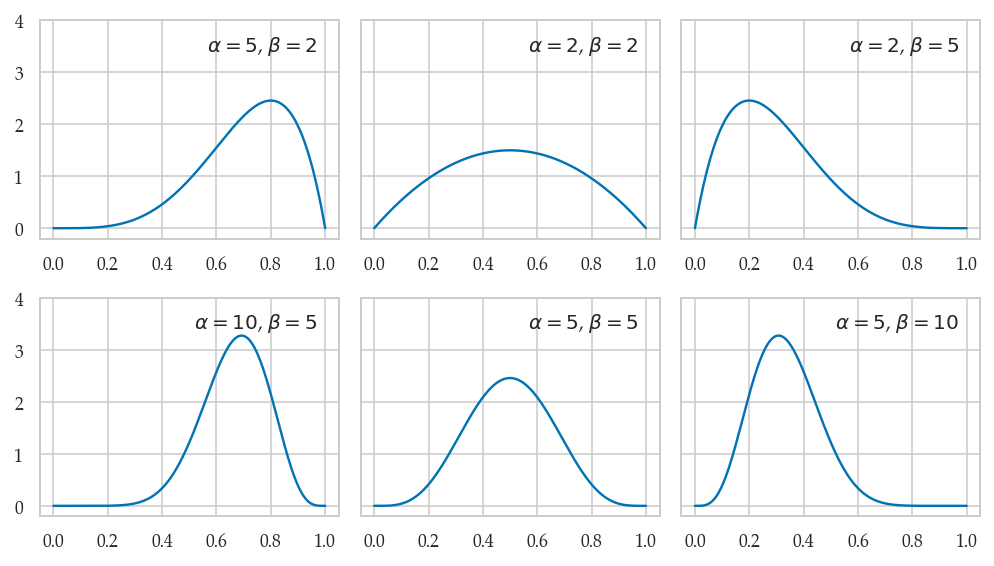

In [70]:
from scipy.stats import beta as betad

xmax = 1
xs = np.linspace(0, xmax, 1000)
xticks = np.linspace(0, xmax, 6)


# parameter dicts (list of lists)
params_matrix = [
    [dict(a=5,b=2),    dict(a=2,b=2),   dict(a=2,b=5)],
    [dict(a=10,b=5),   dict(a=5,b=5),   dict(a=5,b=10)],
]

params_to_latex = {
    "a": "\\alpha",
    "b": "\\beta",
}

_ = generate_pdf_panel("figures/prob/probpanels/beta_panel.pdf",
                       xs, betad, params_matrix,
                       params_to_latex=params_to_latex,
                       xticks=xticks,
                       ylims=[-0.2,4])

### Cauchy (optional)

In [71]:
from scipy.stats import cauchy

x0 = 3
gamma = 5

rvC = cauchy(x0, gamma)

In [72]:
rvC.mean(), rvC.var()

(nan, nan)

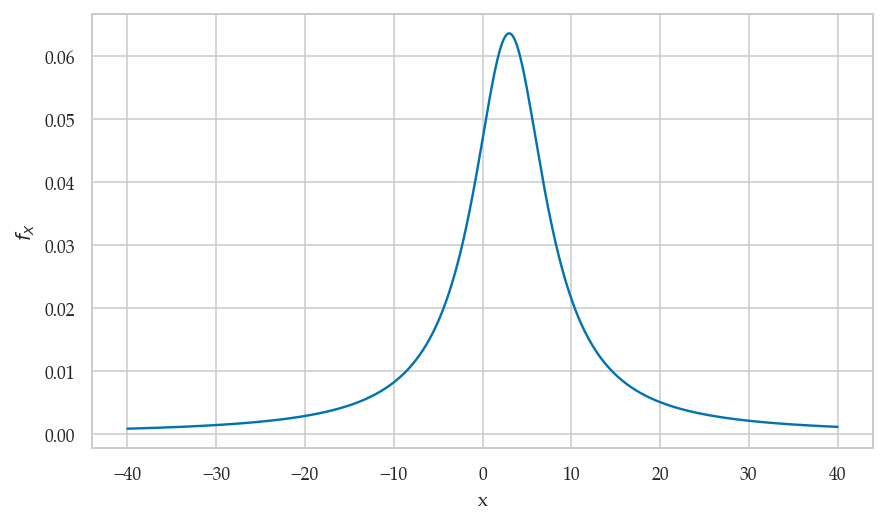

In [73]:
_ = plot_pdf(rvC, xlims=[-40,40])

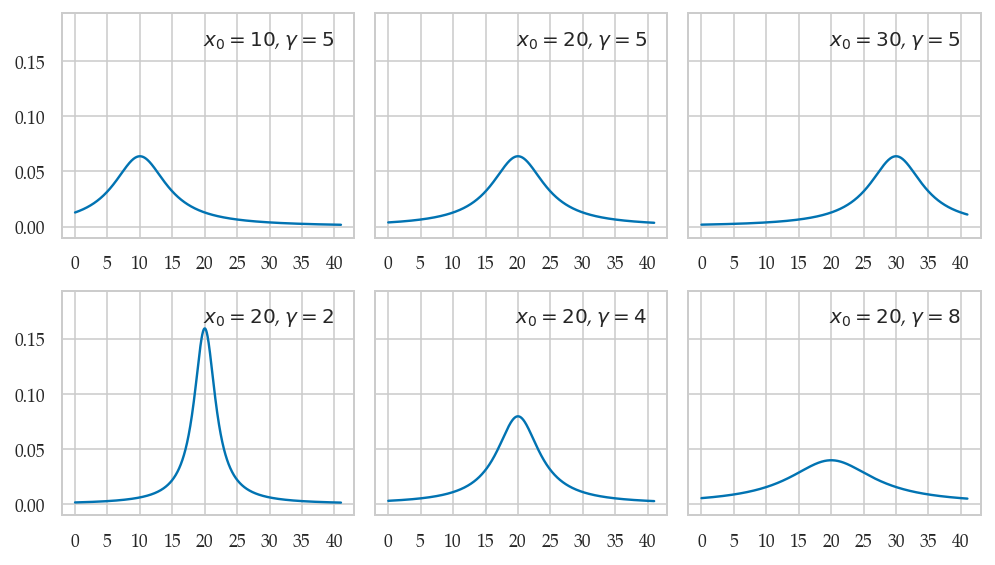

In [74]:
from scipy.stats import cauchy

xmax = 41
xs = np.linspace(0, xmax, 1000)
xticks = np.arange(0, xmax, 5)

# parameter dicts (list of lists)
params_matrix = [
    [dict(loc=10,scale=5),  dict(loc=20,scale=5),  dict(loc=30,scale=5)],
    [dict(loc=20,scale=2),  dict(loc=20,scale=4),  dict(loc=20,scale=8)],
]

params_to_latex = {
    "loc":"x_0",
    "scale":"\\gamma"
}

_ = generate_pdf_panel("figures/prob/probpanels/cauchy_panel.pdf",
                       xs, cauchy, params_matrix, xticks=xticks, ylims=[-0.01,0.193],
                       params_to_latex=params_to_latex)